In [4]:
import pandas as pd
import numpy as np
#pip install git+https://github.com/milesgranger/gap_statistic    
from gap_statistic import OptimalK
import scipy.spatial.distance as ssd
import itertools
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Inspecting the relation between the clustering method using the custom distance metrics and the sector classification for each dataset

## Importing the test data and estimating the correlation matrix

In [33]:
sp500 = pd.read_csv('./data/sp_500_returns.csv', index_col='Date')

In [4]:
sp500.head()

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.007950,-0.017578,0.023444,0.005374,0.003415,-0.007671,-0.003879,-0.000378,-0.010150,-0.001388,...,-0.017197,-0.006584,-0.010635,0.000233,-0.000283,0.033015,0.006829,-0.013534,-0.007559,0.022063
2012-01-05,0.022382,0.087475,0.006363,0.011102,0.007592,0.008835,-0.002301,-0.019082,0.007072,0.004447,...,-0.010446,0.004418,0.008880,-0.003022,0.000848,-0.014247,0.007631,0.011840,-0.001410,0.028005
2012-01-06,0.010811,0.023766,0.004637,0.010454,0.002598,-0.007116,-0.009047,-0.001733,0.008427,-0.006641,...,-0.035186,-0.002933,-0.006486,-0.007463,-0.005932,-0.016797,0.007237,0.002600,-0.008192,0.001135
2012-01-09,0.026203,0.021429,-0.000280,-0.001586,-0.000518,0.003859,-0.000179,-0.001736,-0.006616,0.019499,...,-0.002805,0.000735,0.021759,0.004464,-0.004831,0.003973,-0.003843,0.007410,-0.004557,0.013605
2012-01-10,0.018760,0.000000,0.000839,0.003580,0.011408,-0.002746,0.004655,0.017201,0.023484,0.004372,...,0.008346,0.008082,0.001825,0.002573,0.014278,0.012267,0.006206,0.020964,0.009156,0.016219


In [3]:
psi20 = pd.read_csv('./data/psi_20_returns.csv', index_col='Date')

In [34]:
E_matrix = np.corrcoef(sp500.T)

In [6]:
E_matrix.shape

(460, 460)

To be able to pass the distance matrix to the ssd funciton (which transforms the distance matrix to a condensed form) it's necessary to round the entries of the matrix first in order to prevent a validation error regarding the symmetry of the matrix.

In [35]:
D_matrix = np.sqrt(2*(1- E_matrix))
D_matrix = np.around(D_matrix, decimals=7)

In [7]:
D_matrix.shape

(16, 16)

To be able to pass this custom distance matrix to the scipy clustering function, it's necessary to obtain the matrix in condensed form (more info here: https://stackoverflow.com/questions/18952587/use-distance-matrix-in-scipy-cluster-hierarchy-linkage)

In [36]:
D_condensed = ssd.squareform(D_matrix)

In [9]:
D_condensed.shape

(105570,)

## Getting the optimal number of clusters via GAP Statistic (Work in progress)

In [6]:
optimalK = OptimalK()

In [8]:
n_clusters = optimalK(sp500, cluster_array=np.arange(10, 30))
n_clusters

25

In [9]:
optimalK(D_matrix, cluster_array=np.arange(10,30))

27

In [11]:
optimalK(D_matrix, cluster_array=np.arange(10,35))

34

## Plotting the dendogram associated to the hierarchical agglomerative clustering 

In [37]:
Z = linkage(D_condensed, 'ward', optimal_ordering = True)

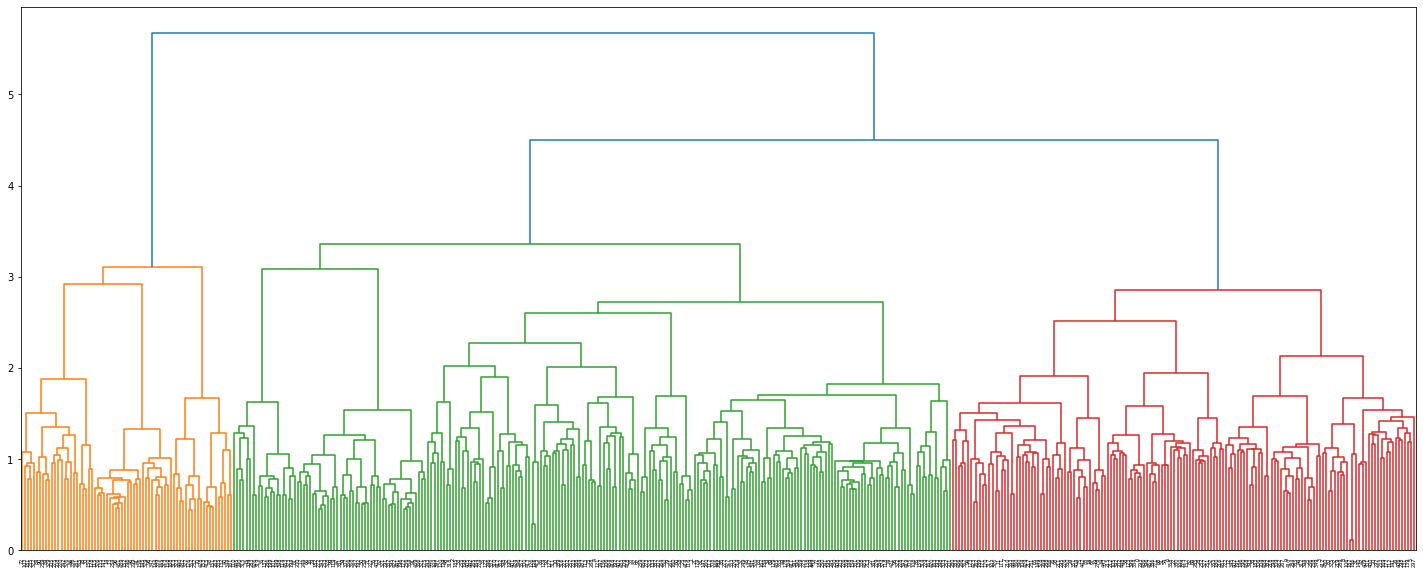

In [11]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Plot the dendogram with only 4 levels

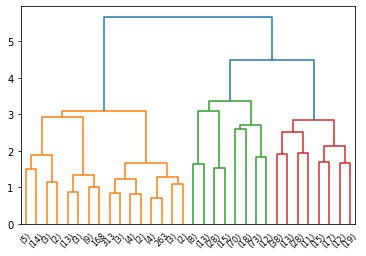

In [ ]:
dn = dendrogram(Z, p = 4, truncate_mode='level')

## Analyzing the relation between the sectors of the assets and the clusters found

In [38]:
labels = fcluster(Z, 25, criterion="maxclust")

In [39]:
np.unique(labels, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25], dtype=int32),
 array([19,  5, 26, 20, 21, 43,  9, 14, 11, 17, 14,  5, 13,  5, 46, 27, 12,
        38, 13, 28, 11, 15, 17, 12, 19]))

In [40]:
labels_order = labels.argsort()

In [41]:
sp500.columns.values[labels == 24]

array(['ADBE', 'AMZN', 'ANSS', 'CDNS', 'CRM', 'GOOG', 'GOOGL', 'INTU',
       'MSFT', 'SNPS', 'TYL', 'VRSN'], dtype=object)

In [42]:
import bs4 as bs
import requests

In [43]:
resp = requests.get('https://en.wikipedia.org/w/index.php?title=List_of_S%26P_500_companies&oldid=1062834329')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
sp500_tabla = pd.read_html(str(table))[0]

In [23]:
tickers_sp = list(sp500_tabla.sort_values('GICS Sector')['Symbol'])
sectors_sp = list(sp500_tabla.sort_values('GICS Sector')['GICS Sector'])
tickers_sp[tickers_sp.index('BF.B')] = 'BF-B'
tickers_sp[tickers_sp.index('BRK.B')] = 'BRK-B'

In [44]:
sectors_selected = []
for tick in sp500.columns.values:
    index = tickers_sp.index(tick)
    sectors_selected.append(sectors_sp[index])

In [45]:
sectors_selected= np.array(sectors_selected)

In [46]:
d = {'ticker': sp500.columns.values[labels_order[::-1]], 'sector': sectors_selected[labels_order[::-1]], 'label': labels[labels_order[::-1]]}
df = pd.DataFrame(data=d)

In [47]:
df[df['label'] == 19]

,ticker,sector,label
102,RE,Financials,19
103,PGR,Financials,19
104,MMC,Financials,19
105,AJG,Financials,19
106,BRO,Financials,19
107,AON,Financials,19
108,WRB,Financials,19
109,CINF,Financials,19
110,CB,Financials,19
111,AIZ,Financials,19


In [48]:
df[df['label'] == 24]

,ticker,sector,label
19,GOOGL,Communication Services,24
20,ADBE,Information Technology,24
21,GOOG,Communication Services,24
22,TYL,Information Technology,24
23,CDNS,Information Technology,24
24,SNPS,Information Technology,24
25,INTU,Information Technology,24
26,AMZN,Consumer Discretionary,24
27,CRM,Information Technology,24
28,VRSN,Information Technology,24


In [49]:
df[df['label'] == 5]

,ticker,sector,label
369,APA,Energy,5
370,DVN,Energy,5
371,HAL,Energy,5
372,PXD,Energy,5
373,MRO,Energy,5
374,XOM,Energy,5
375,KMI,Energy,5
376,CTRA,Energy,5
377,COP,Energy,5
378,MPC,Energy,5


# Applying the hcaa algorithm using the created function on real data

## Loading the PSI 20 dataset

In [5]:
psi20 = pd.read_csv('./data/psi_20_returns.csv', index_col='Date')

In [6]:
E_matrix = np.corrcoef(psi20.T)
D_matrix = np.sqrt(2*(1- E_matrix))
D_matrix = np.around(D_matrix, decimals=7)
D_condensed = ssd.squareform(D_matrix)

## Calculating the optimal number of clusters

### Getting the optimal number of clusters using the silouhette score

(More info on how to interpretate this score in here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

Basically, the closer the average silhoutte score is to 1, the best the metric is.

For more information about how the silhouette score is calculated, check :
https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [7]:
from sklearn.metrics import silhouette_score

In [8]:
Z = linkage(D_condensed, 'ward', optimal_ordering = True)

It can be seen that aparently the best number of clusters is then 7

In [9]:
for i in range(3, 10):
    print(i)
    labels = fcluster(Z, i, criterion="maxclust")
    score = silhouette_score(D_matrix, labels, metric='precomputed')
    print(score)

3
0.04221048137065386
4
0.044665384454622925
5
0.04965704643742622
6
0.051408559601023016
7
0.054939218373783294
8
0.04584163254280825
9
0.045686727224263174


## Importing the custom function and getting the weights

In [10]:
import hcaa_alocation

The function receives as an input a numpy matrix of dimentions $n x t$ and the number of clusters wanted

In [11]:
index_assets, weight_assets = hcaa_alocation.hcaa_alocation(psi20.values, 7)

1.0000010000000001


The function returns the index of the assets (as in the original data matrxi) and the respective capital allocaction for that asset

In [12]:
index_assets

[10, 15, 5, 6, 1, 0, 11, 14, 12, 7, 2, 9, 3, 4, 13, 8]

In [15]:
psi20.columns[index_assets]

Index(['NOS.LS', 'SON.LS', 'EGL.LS', 'GALP.LS', 'BCP.LS', 'ALTR.LS', 'NVG.LS',
       'SEM.LS', 'PHR.LS', 'IBS.LS', 'COR.LS', 'NBA.LS', 'EDP.LS', 'EDPR.LS',
       'RENE.LS', 'JMT.LS'],
      dtype='object')

In [13]:
weight_assets

[0.03125,
 0.03125,
 0.03125,
 0.03125,
 0.03125,
 0.03125,
 0.03125,
 0.03125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.041667,
 0.041667,
 0.041667,
 0.125]

In [20]:
dict(zip(psi20.columns[index_assets], weight_assets))

{'NOS.LS': 0.03125,
 'SON.LS': 0.03125,
 'EGL.LS': 0.03125,
 'GALP.LS': 0.03125,
 'BCP.LS': 0.03125,
 'ALTR.LS': 0.03125,
 'NVG.LS': 0.03125,
 'SEM.LS': 0.03125,
 'PHR.LS': 0.125,
 'IBS.LS': 0.125,
 'COR.LS': 0.125,
 'NBA.LS': 0.125,
 'EDP.LS': 0.041667,
 'EDPR.LS': 0.041667,
 'RENE.LS': 0.041667,
 'JMT.LS': 0.125}